# Preparing the Data for Structure Learning


In [4]:
import pandas as pd
import warnings
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import causalnex_dataset_tools as cdt
import CausalnexDataset as cd


file = '../lightsail_dataset.csv'
a = cd.CausalnexDataset(dataset=file, delimiter_char=",", columns_to_drop=["time"], threshold=14, dropna=True)

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'atmelPwr_curr', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'atmelPwr_curr', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


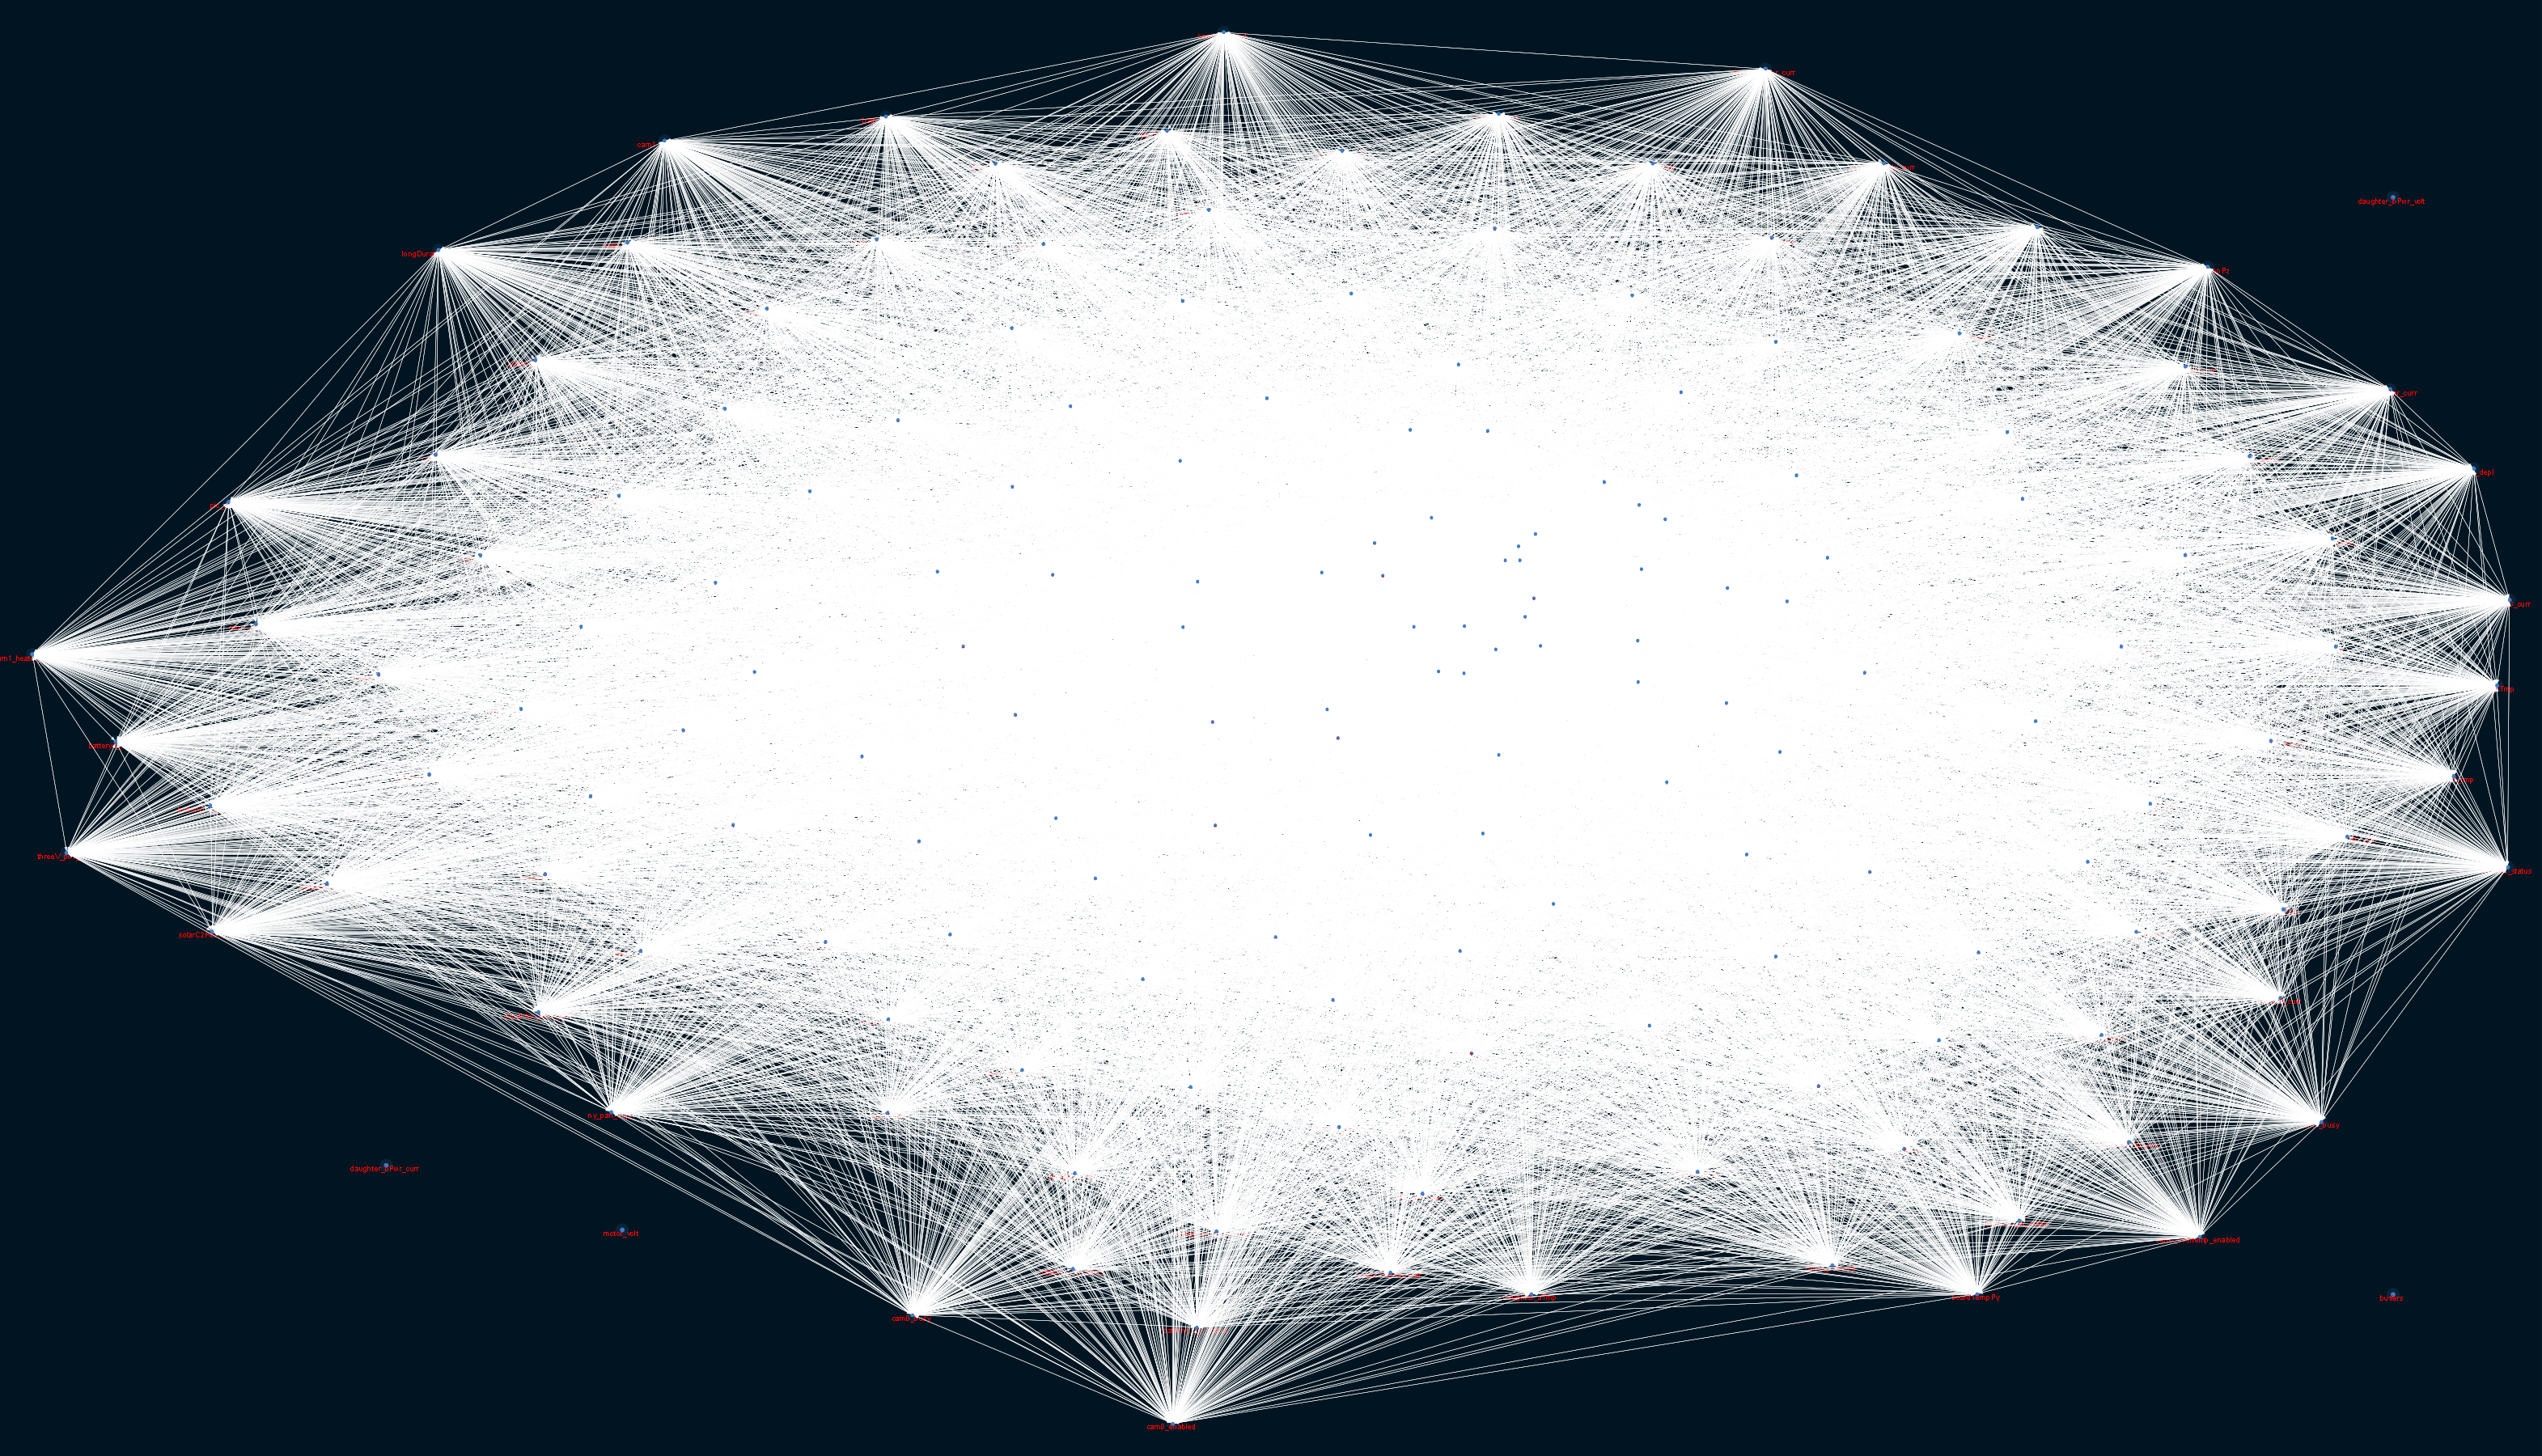

In [7]:

viz = a.get_graph()
Image(viz.draw(format="png"))

In [6]:
# Obtenemos los datos estadísticos de la matriz de adyancencia para planear un cribado de las relaciones espurias y menos relevantes
a.get_edges_data()

weight
count  17.000000
mean   24.297860
std    10.794930
min    14.510978
25%    16.749345
50%    19.414393
75%    26.701484
max    52.036817

In [5]:
a.edges_to_dataframe().sort_values(["weight"], ascending=False)

source     target     weight
13                q2  mb_gyro_y  52.036817
10                q1  mb_gyro_y  43.493562
16       wheel_speed   px_mag_z  38.094084
7                 q0   px_mag_y  28.476623
9                 q1  mb_gyro_x  26.701484
15       wheel_speed   boottime  25.765821
8                 q0   py_mag_x  23.082748
2           idleTime   py_mag_x  22.263748
12                q2  mb_gyro_x  19.414393
4           tx_bytes  mb_gyro_z  19.395445
14                q3   boottime  19.038421
1           idleTime  mb_gyro_z  17.144189
6                 q0   boottime  16.749345
5           tx_bytes   py_mag_x  15.964162
11                q1   py_mag_y  15.840105
3      freeDataFlash   boottime  15.091694
0   fiveV_plPwr_volt   boottime  14.510978

In [ ]:

a.reset_threshold(10.697056)
viz = a.get_graph()
Image(viz.draw(format="png"))

In [ ]:
# Aunque la media no es un valor muy representativo por quedar muy por encima de los tres cuartiles, la elegiremos en este caso para compensar la gran cantidad de pesos demasiado pequeños.
# Utilizaremos esta media para quedarnos solo con aquellos nodos con pesos que la superen y utilizarla como umbral de pesos en el grafo. 
mean = 4.203931e-04
a.reset_threshold(mean)
viz = a.get_graph()

Image(viz.draw(format="png"))

In [ ]:
# Aunque la media no es un valor muy representativo por quedar muy por encima de los tres cuartiles, la elegiremos en este caso para compensar la gran cantidad de pesos demasiado pequeños.
# Utilizaremos esta media para quedarnos solo con aquellos nodos con pesos que la superen y utilizarla como umbral de pesos en el grafo. 
q3 = 3.854647e-17
a.reset_threshold(q3)
viz = a.get_graph()

Image(viz.draw(format="png"))

In [ ]:
# El cuartil 3 tiene un valor demasiado bajo y nos proporciona más relaciones de las que cabría esperar. Vamos a examinar los pesos más elevados para poder elegir un umbral razonable.

df = a.edges_to_dataframe().sort_values("weight", ascending=False)
df.head(60)


In [ ]:
# Vemos que a partir de 7.707169e-08 empiezan a entrar relaciones que a priori tienen poco sentido, así que estableceremos el umbral ahí.

a.reset_threshold(7.707169e-08)

viz = a.get_graph()

Image(viz.draw(format="png"))

In [ ]:
# Nos quedamos solo con el subgrafo que nos interesa

viz = a.get_graph(largest_subgraph=True)

Image(viz.draw(format="png"))

In [ ]:
df = a.edges_to_dataframe()
df

In [ ]:
edges_to_remove = [(row["source"], row["target"]) for i, row in df.iterrows() if row["target"] in ["sunmars_km", "earthmars_km"] and row["source"] not in ["sunmars_km", "earthmars_km"]  ]
a.remove_edges(edges=edges_to_remove)

viz = a.get_graph(largest_subgraph=True)

Image(viz.draw(format="png"))

In [ ]:
edges_to_add = [("earthmars_km", "sunmarsearthangle_deg")]
a.add_edges(edges=edges_to_add)


viz = a.get_graph(largest_subgraph=True)

Image(viz.draw(format="png"))